# MACHINE LEARNING: Aplicaciones con scikit-learn



**Victor Fica León**

# Que es machine learning ?

<div class="stretch"><img src="images/ML-1.png"/></div>

# Areas de aplicación

<div class="stretch"><img src="images/ML-2.png" width=100%/></div>

# Tipos de Aprendizaje
<div class="stretch"><img src="images/ML-3.png" width=100%/></div>

# Aprendizaje Supervisado
<div class="stretch"><img src="images/ML-4.png" width=100%/></div>

# Aprendizaje No Supervisado
<div class="stretch"><img src="images/ML-5.png" width=100%/></div>

# Representación de los Datos

Arreglo o matriz de 2 Dimensiones

**Scikit-learn** utiliza arreglos tipo `[n_samples, n_features]`
<div class="stretch"><img src="images/ML-array.png" width=100%/></div>

# Ejemplo aplicación en Iris Dataset

Conjunto de datos con **150 muestras**

**4 atributos** medidos a cada muestra

**3 especies de Iris** Setosa,Versicolor, Virginica
<div class="stretch"><img src="images/Iris-data.png" width=900%/></div>

# Visualización de los datos

**Analisis exploratorio de datos**

- Gráfico de cajas
- Gráfico de dispersión
- Histogramas 


In [1]:
%matplotlib inline


import seaborn; seaborn.set()
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
class_names = iris.target_names

In [3]:
print iris.data.shape
print iris.data[0:5] 

(150, 4)
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [4]:
print "0=Setosa, 1=Versicolor, 2=Virginica"
print iris.target

0=Setosa, 1=Versicolor, 2=Virginica
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


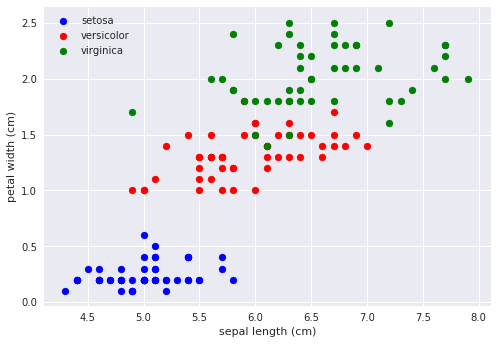

In [28]:
x_index = 0
y_index = 3

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)
    

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()


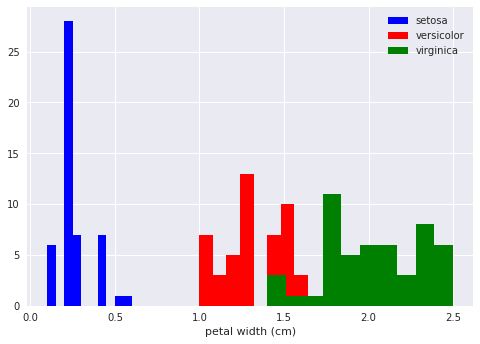

In [6]:
x_index = 3
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(iris.data[iris.target==label, x_index], 
             label=iris.target_names[label],
             color=color)

plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right')
plt.show()

## Diagrama de dispersion con Seaborn y Pandas

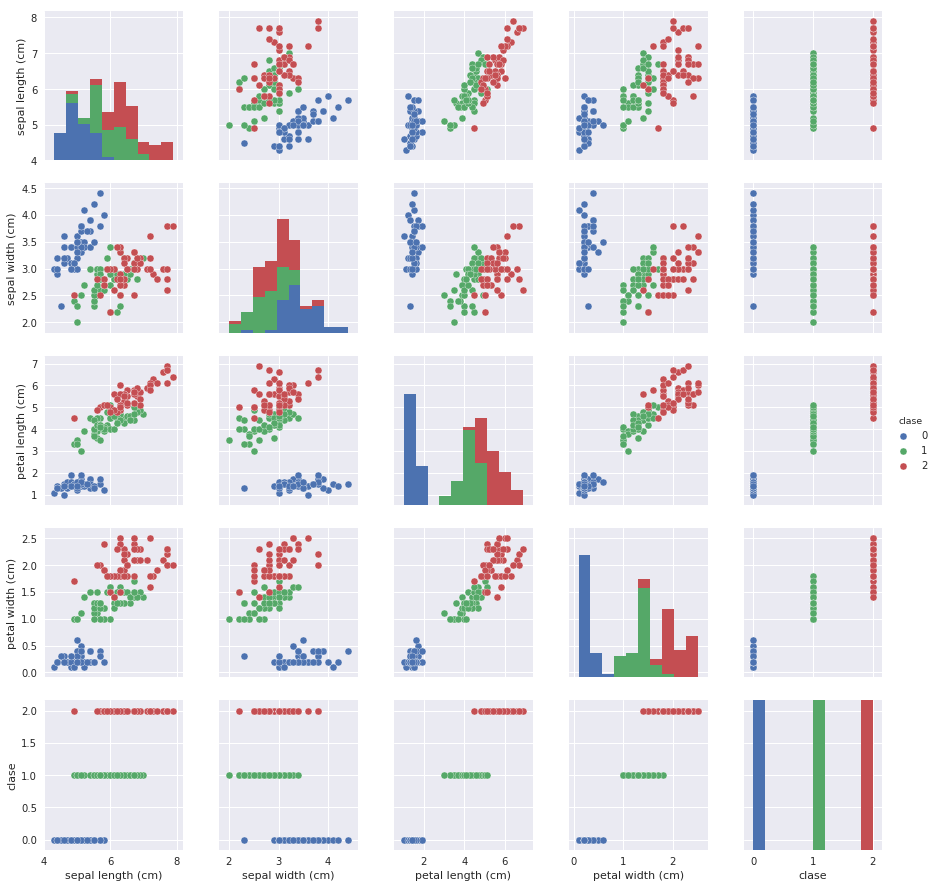

In [7]:
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["clase"] = iris.target
g = seaborn.pairplot(iris_df,hue="clase")

# Generando Modelos
## Como funciona Scikit-learn
<div class="stretch"><img src="images/ML-estimator.png" width=90%/></div>

# Generando Modelos
## Datos de entrenamiento y Datos de Prueba

<div class="stretch"><img src="images/training-test.png" width=100%/></div>

In [8]:
X, y = iris.data, iris.target

In [9]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.5, 
                                                    random_state=123)
print("Etiquetas para datos de entrenamiento y prueba")
print(train_y)
print
print(test_y)

Etiquetas para datos de entrenamiento y prueba
[1 1 0 2 2 0 0 1 1 2 0 0 1 0 1 2 0 2 0 0 1 0 0 1 2 1 1 1 0 0 1 2 0 0 1 1 1
 2 1 1 1 2 0 0 1 2 2 2 2 0 1 0 1 1 0 1 2 1 2 2 0 1 0 2 2 1 1 2 2 1 0 1 1 2
 2]

[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0 2 2 0 0 1 1 2
 0 0 1 1 0 2 2 2 2 2 1 0 0 2 0 0 1 1 1 1 2 1 2 0 2 1 0 0 2 1 2 2 0 1 1 2 0
 2]


## Muestreo aleatorio estratificado

In [10]:
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.5, 
                                                    random_state=123,
                                                    stratify=y)
print('Todo:', np.bincount(y) / float(len(y)) * 100.0)
print('Entrenamiento:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Prueba:', np.bincount(test_y) / float(len(test_y)) * 100.0)

('Todo:', array([ 33.33333333,  33.33333333,  33.33333333]))
('Entrenamiento:', array([ 33.33333333,  33.33333333,  33.33333333]))
('Prueba:', array([ 33.33333333,  33.33333333,  33.33333333]))


# Clasificación 
## K nearest neighbors (kNN)
<div class="stretch"><img src="images/ML-knn.png" width=70%/></div>

In [11]:
from sklearn.neighbors import KNeighborsClassifier

#Iniciar el modelo
clasificador = KNeighborsClassifier(n_neighbors=5)

#Ajustar el modelo con los datos de entrenamiento
clasificador.fit(train_X,train_y)

#Predicciones con los datos de prueba

pred = clasificador.predict(test_X)

In [12]:
print('Muestras correctamente clasificadas:')
correct_idx = np.where(pred == test_y)[0]
print(correct_idx)

print('\nMuestras incorrectamente clasificadas:')
incorrect_idx = np.where(pred != test_y)[0]
print(incorrect_idx)

print('Accuracy:',clasificador.score(test_X,test_y))

Muestras correctamente clasificadas:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48 50 51
 52 53 54 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72 73 74]

Muestras incorrectamente clasificadas:
[44 49 60]
('Accuracy:', 0.95999999999999996)


In [13]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de Confusión')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')

Matriz de Confusión
[[25  0  0]
 [ 0 23  2]
 [ 0  1 24]]


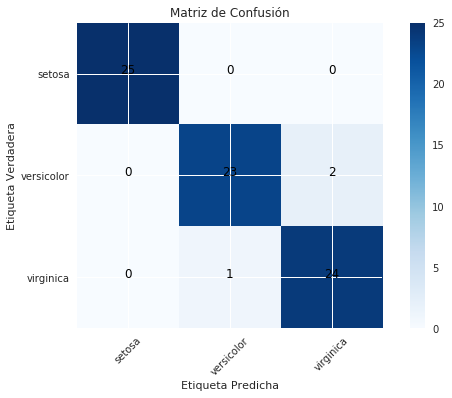

In [14]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(test_y, pred)
plot_confusion_matrix(cfm, classes=class_names,
                      title=u'Matriz de Confusión')

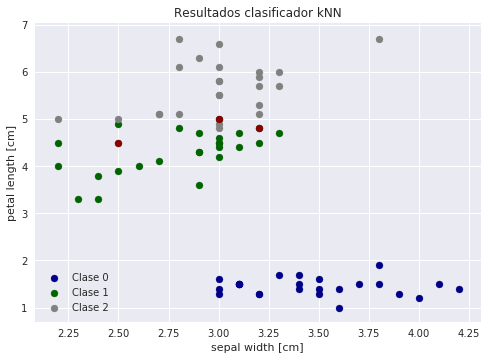

In [15]:
colors = ["darkblue", "darkgreen", "gray"]

for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 1], test_X[idx, 2], color=color, label="Clase %s" % str(n))

plt.scatter(test_X[incorrect_idx, 1], test_X[incorrect_idx, 2], color="darkred")

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=3)
plt.title("Resultados clasificador kNN")
plt.show()

# Support Vector Machines (SVM)

Algoritmo usado para **Clasificación** y **Regresión**

Son clasificadores **discriminativos**
<div class="stretch"><img src="images/SVM1-2.png" width=100%/></div>

# Support Vector Machines (SVM)
## Maximizar el *Margen*
<div class="stretch"><img src="images/SVM3-4.png" width=100%/></div>

In [16]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [17]:
from sklearn.preprocessing import StandardScaler

#Solo tomare 2 atributos, petal_lenght y petal width
sc = StandardScaler()
sc.fit(train_X[:, [2, 3]])
X_train_std = sc.transform(train_X[:, [2, 3]])
X_test_std = sc.transform(test_X[:, [2, 3]])

In [18]:
from sklearn.svm import SVC

#Iniciar el modelo
svm = SVC(kernel='linear', C=1.0, random_state=0)
#Ajustar el modelo
svm.fit(X_train_std, train_y)
#Predicciones en los datos de prueba
pred_svm = svm.predict(X_test_std)


In [19]:
svm.score(X_test_std,test_y)

0.93333333333333335

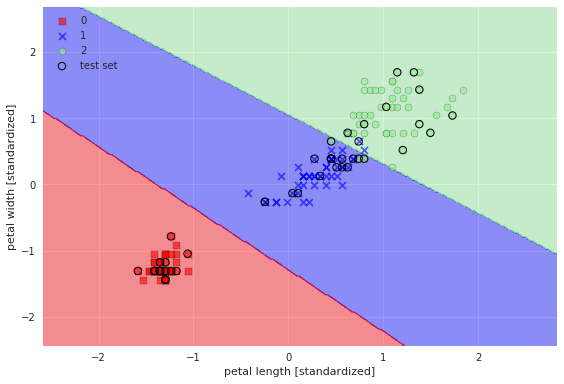

In [20]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((train_y, test_y))
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Modelos de Regresión

**Modelo Lineal** $y = X + bx + \epsilon$

X = Datos

y = Variable respuesta

b = Coeficientes

$\epsilon$ = Ruido Observado



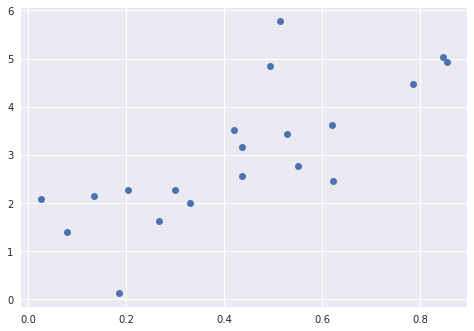

In [21]:
# Generando grupo de datos simples

np.random.seed(2)
X1 = np.random.random(size=(20, 1))
y1 = 3 * X1.squeeze() + 2 + np.random.randn(20)

plt.plot(X1.squeeze(), y1, 'o');

[ 4.47994102]
1.0887286504


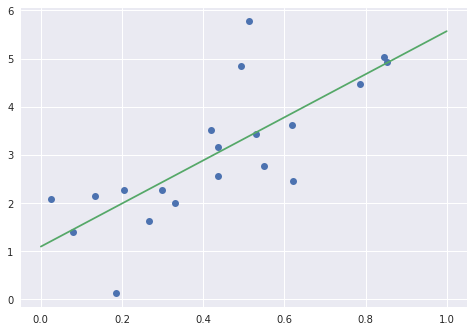

In [22]:
from sklearn.linear_model import LinearRegression

#Iniciar el modelo
model = LinearRegression()
#Ajustar a los datos
model.fit(X1, y1)
# underscore at the end indicates a fit parameter
print(model.coef_)
print(model.intercept_)

# Graficar los datos y la prediccion del modelo
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X1.squeeze(), y1, 'o')
plt.plot(X_fit.squeeze(), y_fit);

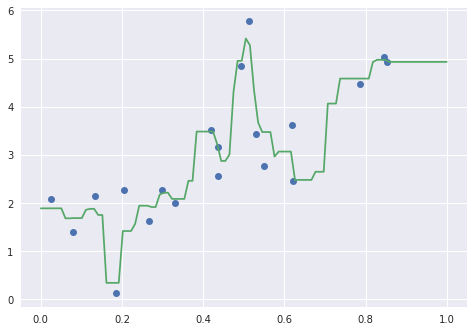

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Ajustar a Random Forest
model = RandomForestRegressor()
model.fit(X1, y1)

# Graficar los datos y la prediccion del modelo
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X1.squeeze(), y1, 'o')
plt.plot(X_fit.squeeze(), y_fit);

# Aprendizaje No Supervizado
## Reducción dimensional

- Ayuda a eliminar ruido
- Retener características "útiles"
- Evitar sobre-ajuste

## Reducción dimensional
**Analisis de Componente Principal (PCA)**

- Encuentra nuevas características que son una combinación lineal de los datos originales
- Busca las direcciones de máxima varianza
- Captura los componentes que explican la mayor varianza
<div class="stretch"><img src="PCA.png" width=50%/></div>

In [24]:
from sklearn.decomposition import PCA

#Estandarización de datos
sc = StandardScaler()
sc.fit(train_X)
X_train_std = sc.transform(train_X)
X_test_std = sc.transform(test_X)

#Aplicando PCA
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

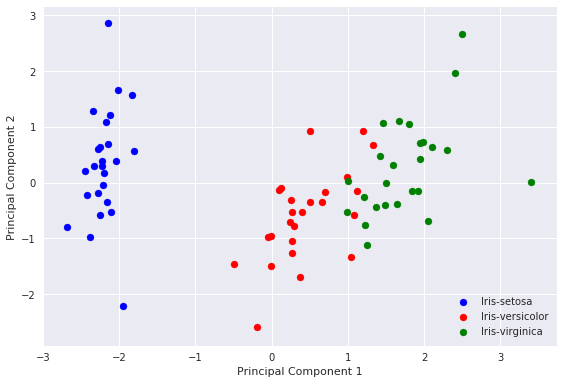

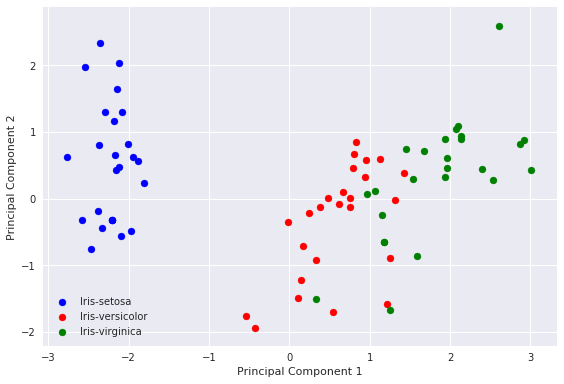

In [25]:
#Graficando datos de entrenamiento y prueba 
for X, y in zip((X_train_pca, X_test_pca), (train_y, test_y)):

    for i, annot in enumerate(zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                                  ('blue', 'red', 'green'))):
        plt.scatter(X[y==i, 0],
                    X[y==i, 1],
                    label=annot[0],
                    c=annot[1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Aprendizaje No Supervizado
## Agrupamiento (Clustering)

- Analisis exploratorio de los datos
- Compresión para reducir datos
- Ejemplos como:
    - Agrupar noticias de la web similares
    - Elaborar perfiles de consumidores similares

(10, 64)


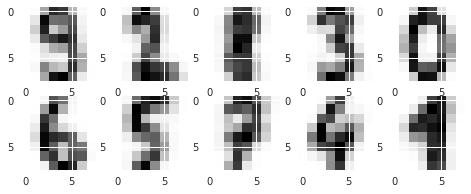

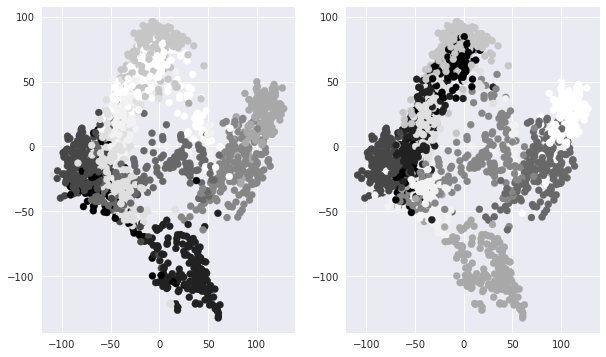

In [26]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

digits = load_digits()
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(digits.data)

print(kmeans.cluster_centers_.shape)

#------------------------------------------------------------
# visualize the cluster centers
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i)
    ax.imshow(kmeans.cluster_centers_[i].reshape((8, 8)))#,cmap=plt.cm.binary)
from sklearn.manifold import Isomap
X_iso = Isomap(n_neighbors=10).fit_transform(digits.data)

#------------------------------------------------------------
# visualize the projected data
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters);
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=digits.target);

<div class="stretch"><img src="images/ML-workflow.png" width=100%/></div>
by Sebastian Raschka

https://redshiftzero.github.io/2015/08/29/Manipulation-and-Machine-Learning/

http://machinelearningmastery.com/basic-concepts-in-machine-learning/

https://github.com/rasbt/pattern_classification